In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy.signal import chirp
import scipy.signal as signal
from matplotlib.animation import FuncAnimation
%matplotlib widget

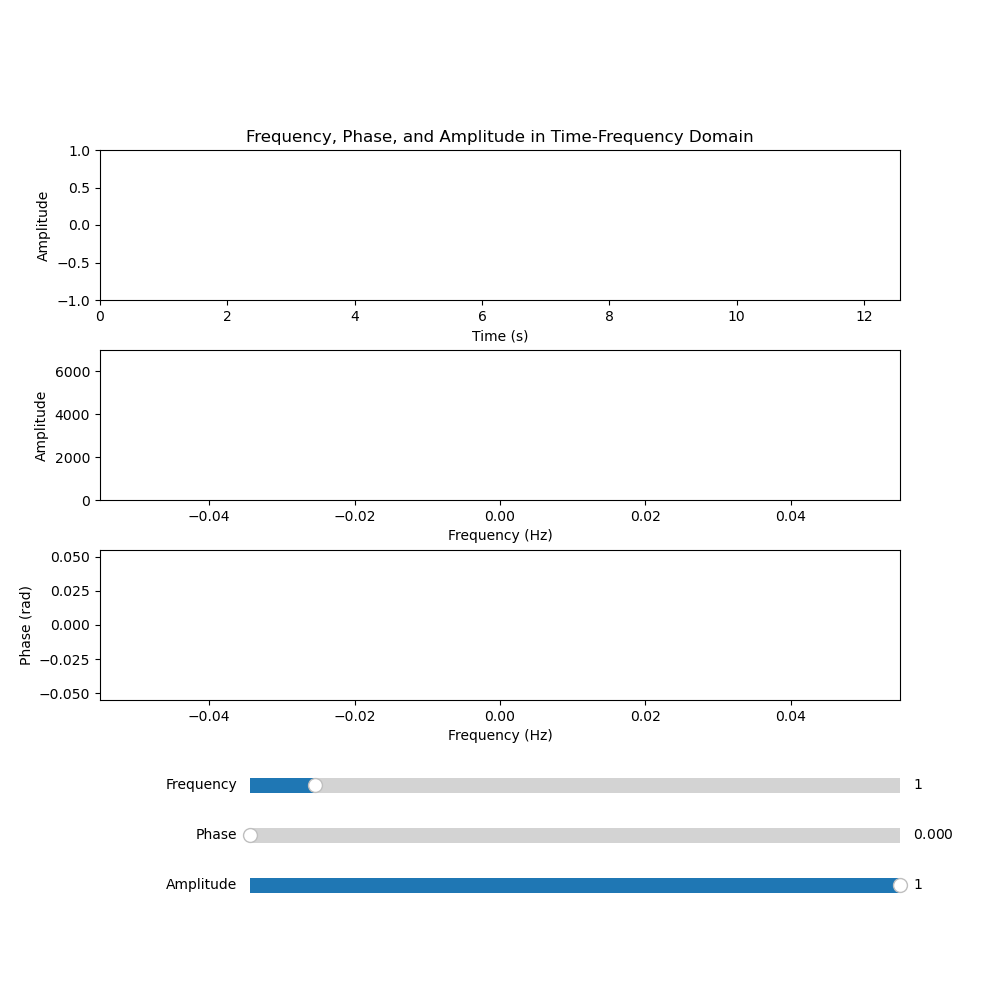

In [2]:
# Set up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.set_xlim(0, 4*np.pi)

# Initialize the line objects using discrete view of the sinusoidal wave
# time domain signal
line1, = ax1.plot([], [])
# amplitude in frequency domain
line2, = ax2.plot([], [])
# phase in frequency domain
line3, = ax3.plot([], [])
# set y-axis limits to the maximum amplitude of the sinusoidal wave
ax1.set_ylim(-1, 1)
ax2.set_ylim(0, 7000)
# set subfigure size
ax1.set_position([0.1, 0.7, 0.8, 0.15])
ax2.set_position([0.1, 0.5, 0.8, 0.15])
ax3.set_position([0.1, 0.3, 0.8, 0.15])
# set x and y label
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Phase (rad)')
# set picture title
ax1.set_title('Frequency, Phase, and Amplitude in Time-Frequency Domain')
# Add sliders for amplitude, phase, and frequency
axcolor = 'lightgoldenrodyellow'
axamp = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)
axphi = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axfreq = plt.axes([0.25, 0.20, 0.65, 0.03], facecolor=axcolor)

amp_slider = Slider(axamp, 'Amplitude', 0, 1, valinit=1)
phi_slider = Slider(axphi, 'Phase', 0, 2*np.pi, valinit=0)
freq_slider = Slider(axfreq, 'Frequency', 0, 10, valinit=1)

# Define the update function for the animation
def update(frame):
    # Get the current values of amplitude, phase, and frequency from the sliders
    A = amp_slider.val
    phi = phi_slider.val
    f = freq_slider.val

    # Generate the sinusoidal wave with the current parameters
    x = np.linspace(0, 4*np.pi, 20000)
    y = A*np.sin(2*np.pi*f*x + phi)

    # Update the line objects with the new data
    line1.set_data(x, y)
    # plot the amplitude spectrum (do not link the max frequency sample with the minimum frequency sample)
    freq = np.fft.fftfreq(len(x), x[1]-x[0])
    fft_results = np.fft.fft(y)
    # reorder the frequency domain signal from -fs/2 to fs/2
    fft_results = np.fft.fftshift(fft_results)
    freq = np.fft.fftshift(freq)
    line2.set_data(freq, np.abs(fft_results))
    # unwarp the phase
    line3.set_data(freq, np.unwrap(np.angle(fft_results)))
    # automatically rescale the y-axis
    ax2.relim()
    ax2.autoscale_view()
    ax3.relim()
    ax3.autoscale_view()
    # set line2 and line3 x-axis limits to -20 to 20
    ax2.set_xlim(-15, 15)
    ax3.set_xlim(-15, 15)

    return line1, line2, line3

# Connect the sliders to the update function
amp_slider.on_changed(update)
phi_slider.on_changed(update)
freq_slider.on_changed(update)

# Create the animation object
# anim = FuncAnimation(fig, update)

# Show the plot
plt.show()

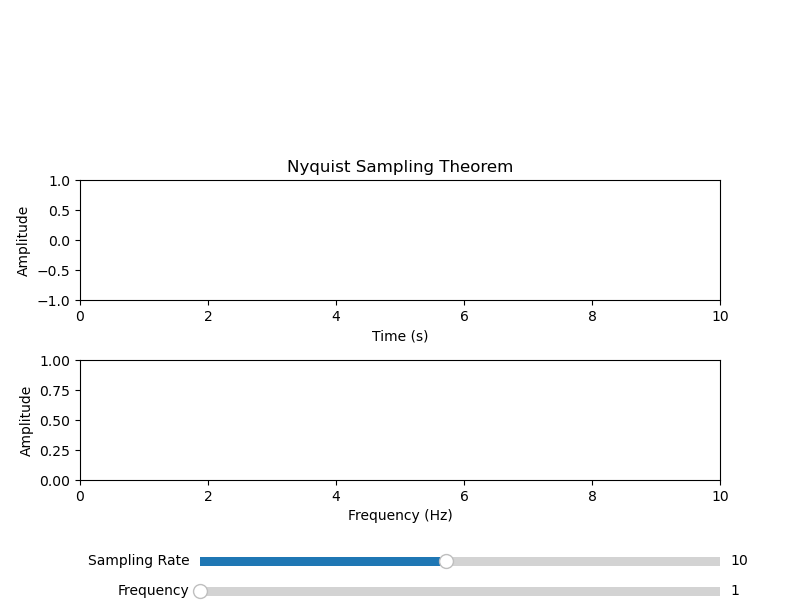

In [3]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 1)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 1)

# Initialize the line objects
line1, = ax1.plot([], [])
line2, = ax2.plot([], [])

# Add sliders for frequency and sampling rate
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.00, 0.65, 0.03], facecolor=axcolor)
axrate = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
# set subfigure size
ax1.set_position([0.1, 0.5, 0.8, 0.2])
ax2.set_position([0.1, 0.2, 0.8, 0.2])
# set title and x-y labels
ax1.set_title('Nyquist Sampling Theorem')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
freq_slider = Slider(axfreq, 'Frequency', 1, 20, valinit=1)
rate_slider = Slider(axrate, 'Sampling Rate', 1, 20, valinit=10)

# Define the update function for the animation
def update(frame):
    # Get the current values of frequency and sampling rate from the sliders
    # obtain the frequency of the sinusoidal wave
    f = freq_slider.val
    # obtain the sampling rate
    fs = rate_slider.val

    # Generate the sinusoidal wave with the current frequency
    # using the sampling rate to determine the number of samples
    x = np.linspace(0, 10, int(fs*10))
    y = np.sin(2*np.pi*f*x)

    # Plot the time-domain signal
    line1.set_data(x, y)
    # add text in the figure to show the frequency
    # Clear the text in the figure
    for text in ax1.texts:
        text.set_text('')
    # set the number in three decimal places
    f = '%.3f' % f
    ax1.text(0.5, 0.5, 'Frequency = ' + str(f) + ' Hz', fontsize=12)

    # Compute the Fourier transform of the signal
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(y), 1/fs)
    # reorder the frequency domain signal from -fs/2 to fs/2
    Y = np.fft.fftshift(Y)
    freqs = np.fft.fftshift(freqs)
    # Plot the frequency-domain signal
    line2.set_data(freqs, np.abs(Y)/len(y)*2)
    # Set the x-limits of the frequency-domain plot to show the Nyquist frequency
    ax2.set_xlim(-fs, fs)
    # find the corresponding positive frequency with the maximum amplitude
    max_freq = np.abs(freqs[np.argmax(np.abs(Y))])
    # add text in the figure to show the maximum frequency
    for text in ax2.texts:
        text.set_text('')
    # set the number in three decimal places
    max_freq = '%.3f' % max_freq
    ax2.text(0.5, 0.5, 'Maximum Frequency = ' + str(max_freq) + ' Hz', fontsize=12)

    # Redraw the figure
    fig.canvas.draw_idle()

    return line1, line2

# Connect the sliders to the update function
freq_slider.on_changed(update)
rate_slider.on_changed(update)

# Show the plot
plt.show()

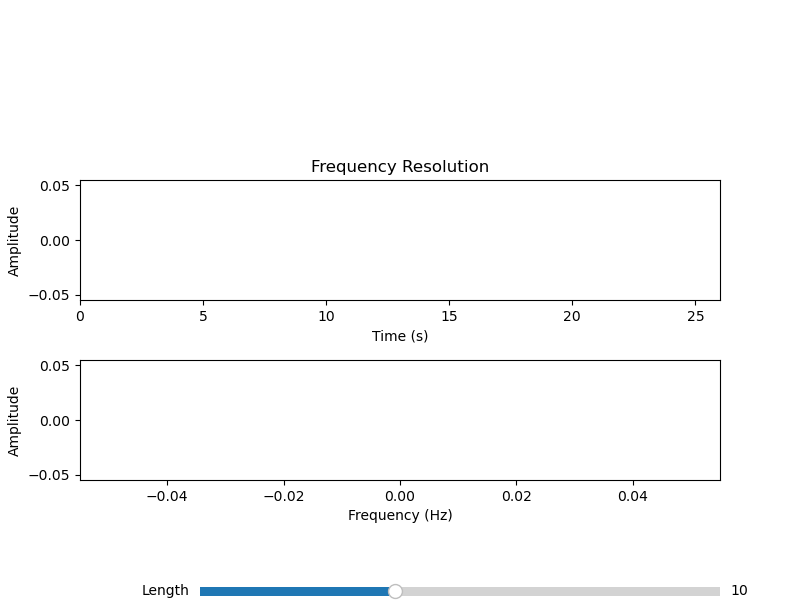

In [4]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.set_xlim(0, 26)

# Initialize the line objects
line1, = ax1.plot([], [])
line2, = ax2.plot([], [])

# Add sliders for the length of the signal
axcolor = 'lightgoldenrodyellow'
axlength = plt.axes([0.25, 0.00, 0.65, 0.03], facecolor=axcolor)
# set subfigure size
ax1.set_position([0.1, 0.5, 0.8, 0.2])
ax2.set_position([0.1, 0.2, 0.8, 0.2])
# set title and x-y labels
ax1.set_title('Frequency Resolution')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
# set the length to be integer
length_slider = Slider(axlength, 'Length', 1, 25, valinit=10, valstep=1)

# Define the update function for the animation
def update(frame):
    # Get the current values of frequency and sampling rate from the sliders
    # obtain the length of the signal
    length = length_slider.val

    # Generate the sinusoidal wave with the current frequency
    fs = 1000
    x = np.linspace(0, length, int(fs*length), endpoint=False)
    f1, f2 = 2, 2.2
    y = 2 * np.sin(2*np.pi*f1*x) + 1.5 * np.sin(2*np.pi*f2*x)

    # Plot the time-domain signal
    line1.set_data(x, y)
    # add text in the figure to show the frequency
    # Clear the text in the figure
    for text in ax1.texts:
        text.set_text('')
    # set the number in three decimal places
    ax1.text(0.5, 0.5, 'f(t) = cos(2*pi*2*t) + cos(2*pi*2.2*t)', fontsize=12)
    # auto scale the y-axis
    ax1.relim()
    ax1.autoscale_view()

    # Compute the Fourier transform of the signal
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(y), 1/fs)
    # reorder the frequency domain signal from -fs/2 to fs/2
    Y = np.fft.fftshift(Y)
    freqs = np.fft.fftshift(freqs)
    # Plot the frequency-domain signal
    line2.set_data(freqs, np.abs(Y))
    # Set the x-limits of the frequency-domain plot to show the Nyquist frequency
    ax2.set_xlim(-7, 7)
    ax2.relim()
    ax2.autoscale_view()

    # Redraw the figure
    fig.canvas.draw_idle()

    return line1, line2

# Connect the sliders to the update function
length_slider.on_changed(update)

# Show the plot
plt.show()

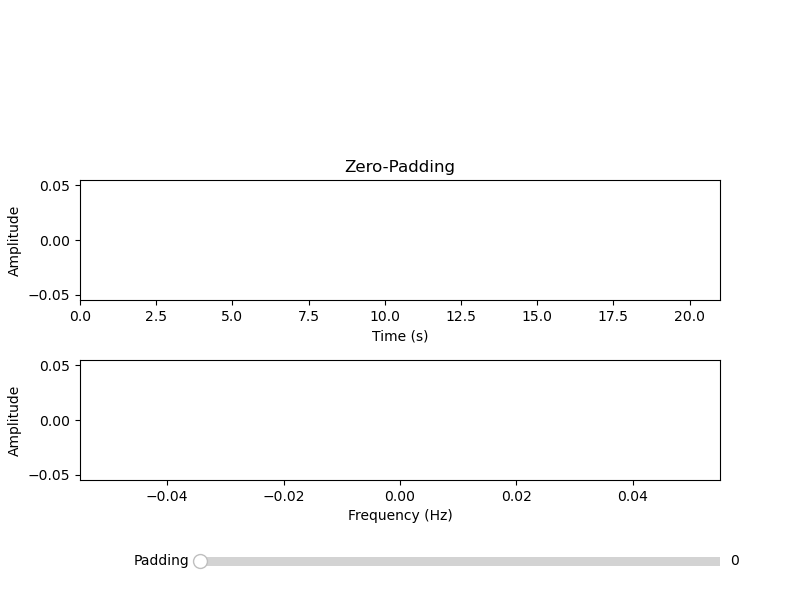

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.set_xlim(0, 21)

# Initialize the line objects
line1, = ax1.plot([], [])
line2, = ax2.plot([], [])

# Add sliders for the length of the signal and the amount of zero-padding
axcolor = 'lightgoldenrodyellow'
axpadding = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
# set subfigure size
ax1.set_position([0.1, 0.5, 0.8, 0.2])
ax2.set_position([0.1, 0.2, 0.8, 0.2])
# set title and x-y labels
ax1.set_title('Zero-Padding')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
# set the padding to be integer
padding_slider = Slider(axpadding, 'Padding', 0, 1000, valinit=0, valstep=100)

# Define the update function for the animation
def update(frame):
    # Get the current values of length and padding from the sliders
    # obtain the length of the signal
    length = 12
    # obtain the amount of zero-padding
    padding = int(padding_slider.val)

    # Generate the sinusoidal wave with the current frequency
    fs = 100
    x = np.linspace(0, length, int(fs*length), endpoint=False)
    f1, f2 = 2, 2.2
    y = np.sin(2*np.pi*f1*x) + np.sin(2*np.pi*f2*x)

    # Zero-pad the signal
    y_padded = np.pad(y, (0, padding), mode='constant')
    # Plot the time-domain signal
    line1.set_data(np.arange(len(y_padded)) / fs, y_padded)
    # auto scale the y-axis
    ax1.relim()
    ax1.autoscale_view()

    # Compute the Fourier transform of the signal
    Y = np.fft.fft(y_padded)
    freqs = np.fft.fftfreq(len(y_padded), 1/fs)
    # reorder the frequency domain signal from -fs/2 to fs/2
    Y = np.fft.fftshift(Y)
    freqs = np.fft.fftshift(freqs)
    # Plot the frequency-domain signal
    line2.set_data(freqs, np.abs(Y))
    # Set the x-limits of the frequency-domain plot to show the Nyquist frequency
    ax2.set_xlim(-7, 7)
    ax2.relim()
    ax2.autoscale_view()

    # Redraw the figure
    fig.canvas.draw_idle()

    return line1, line2

# Connect the sliders to the update function
padding_slider.on_changed(update)

# Show the plot
plt.show()